In [52]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [32]:
df = pd.read_csv('../data/housing_cleaned.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [33]:
print("Shape: ", df.shape)

Shape:  (545, 13)


In [34]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].str.lower().map(
        {
            'yes': 1,
            'no': 0
            }
        )

In [35]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [36]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['area_per_room'] = df['area'] / df['total_rooms']
df['area_per_bedroom'] = df['area'] / df['bedrooms']

In [37]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,total_rooms,area_per_room,area_per_bedroom
535,2100000,3360,2,1,1,1,0,0,0,0,1,0,False,True,3,1120.000000,1680.000000
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,False,True,6,570.000000,684.000000
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,False,True,4,425.000000,566.666667
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,False,True,3,1216.333333,1824.500000
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,False,True,3,996.666667,1495.000000
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True,3,1000.000000,1500.000000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False,4,600.000000,800.000000
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True,3,1206.666667,1810.000000
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False,4,727.500000,970.000000
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,False,True,4,962.500000,1283.333333


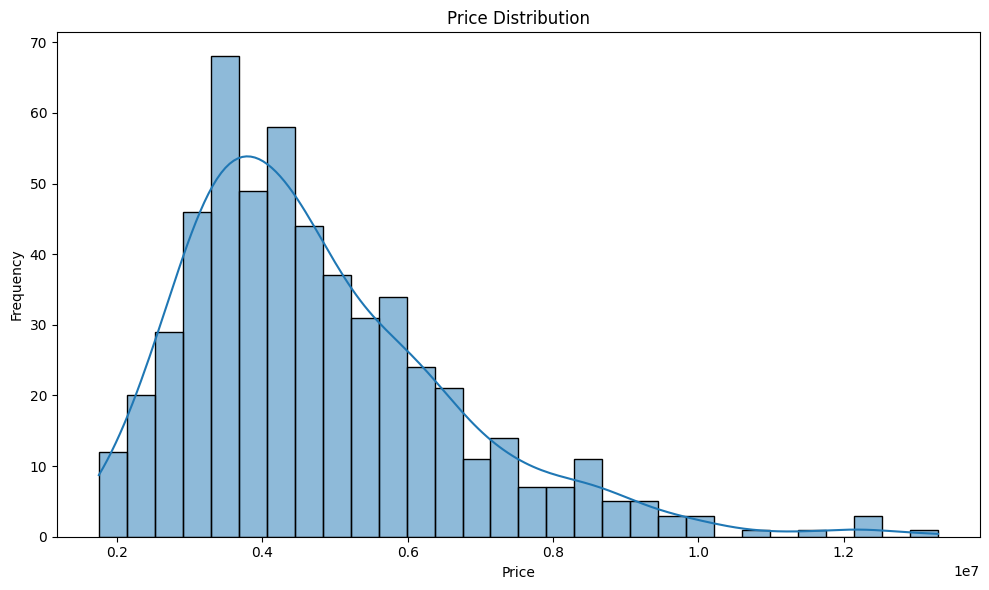

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

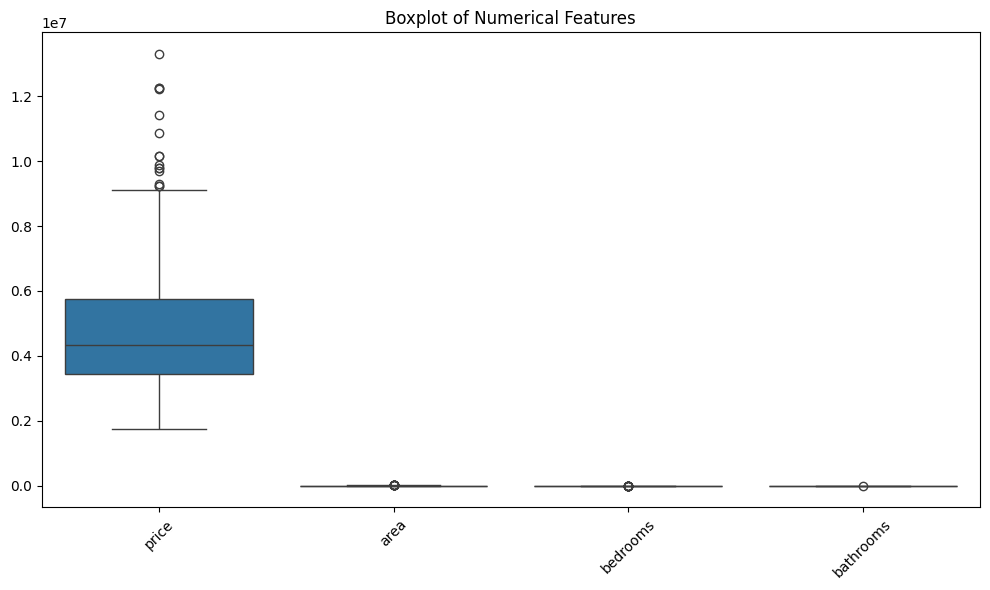

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['price', 'area', 'bedrooms', 'bathrooms']])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

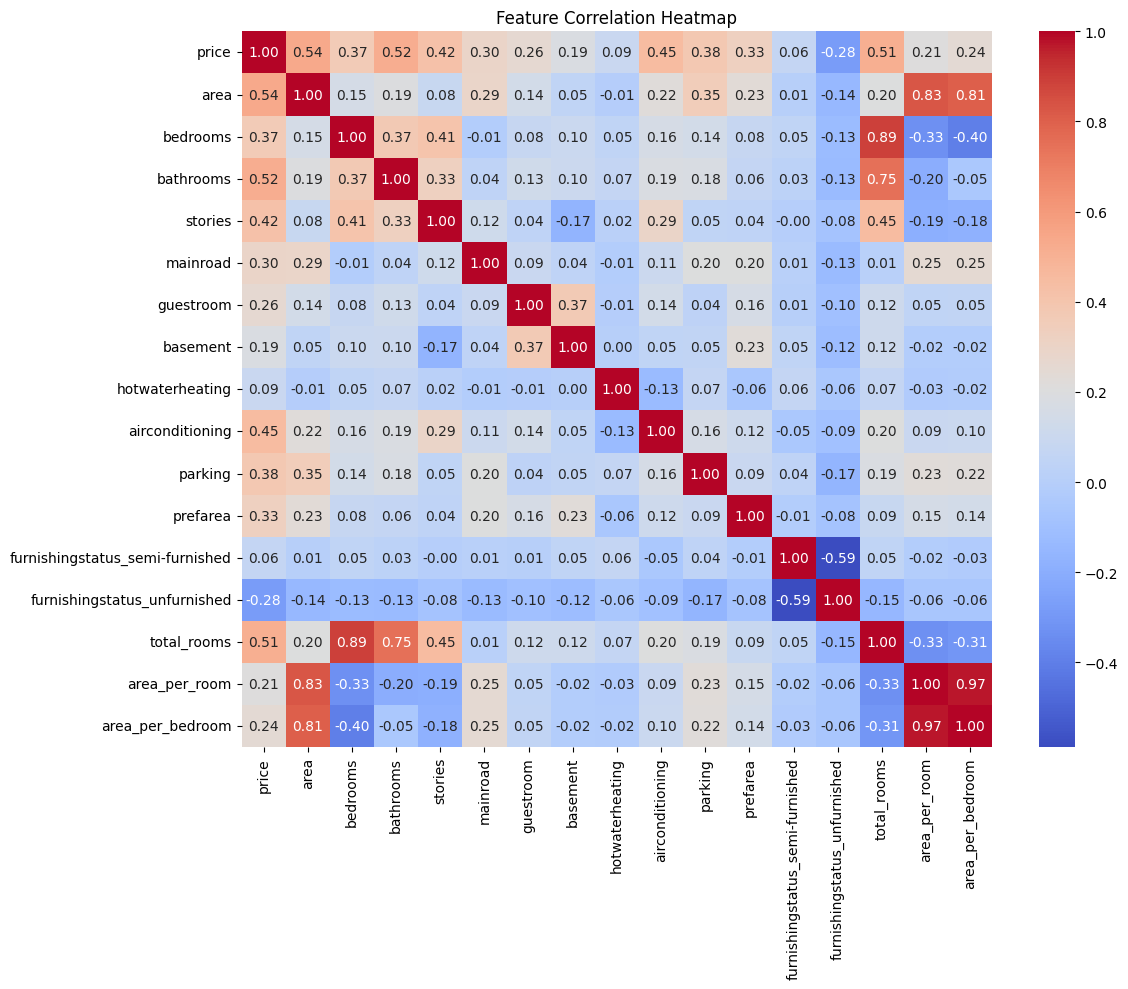

In [56]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [38]:
X = df.drop(['price'], axis=1)
y = np.log1p(df['price']) 

In [39]:
print("X-shape: ", X.shape)
print("y-shape: ", y.shape)

X-shape:  (545, 16)
y-shape:  (545,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 16)
(109, 16)
(436,)
(109,)


In [43]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
print(numeric_features)
print(numeric_transformer)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'total_rooms', 'area_per_room', 'area_per_bedroom'],
      dtype='object')
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])


In [44]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features)
])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'total_rooms', 'area_per_room', 'area_per_bedroom'],
      dtype='object'))])


In [45]:
rf = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=42)
xgb = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=7, random_state=42)

In [46]:
stacked_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=RidgeCV()
)

In [47]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", stacked_model)
])

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'total_rooms', 'area_per_room', 'area_per_bedroom'],
      dtype='object'))]...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=7,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=150,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                   final_estimator=RidgeCV()))])

In [49]:
y_pred = pipeline.predict(X_test)
y_pred_inv = np.expm1(y_pred)
y_test_inv = np.expm1(y_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
relative_accuracy = 100 * (1 - rmse / np.mean(y_test_inv))

In [51]:
print(f"Root Mean Squared Error: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Relative Accuracy: {relative_accuracy:.2f}%")

Root Mean Squared Error: ₹1,447,704.47
R² Score: 0.5854
Relative Accuracy: 71.09%


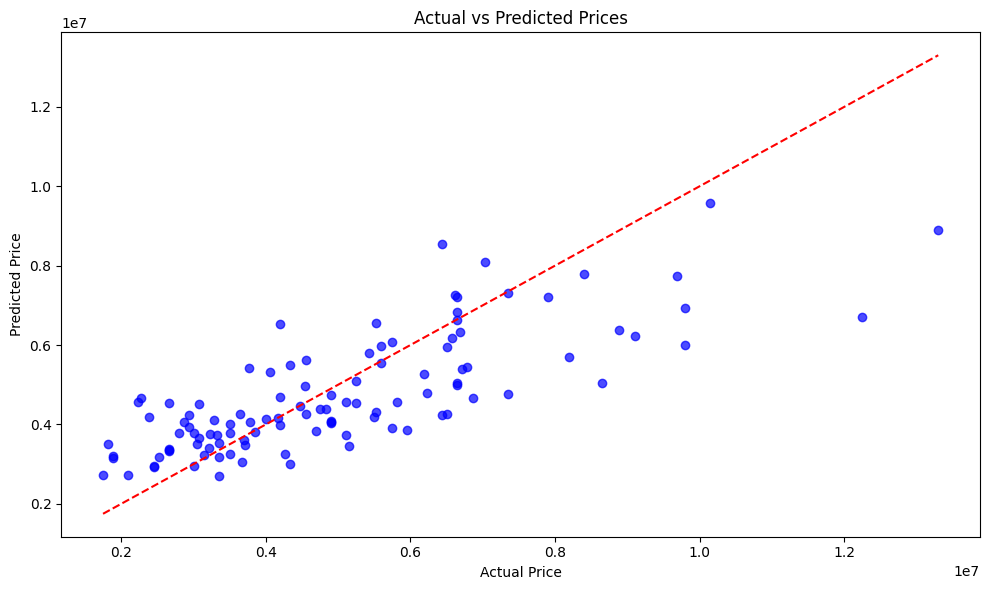

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.7, color='blue')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()

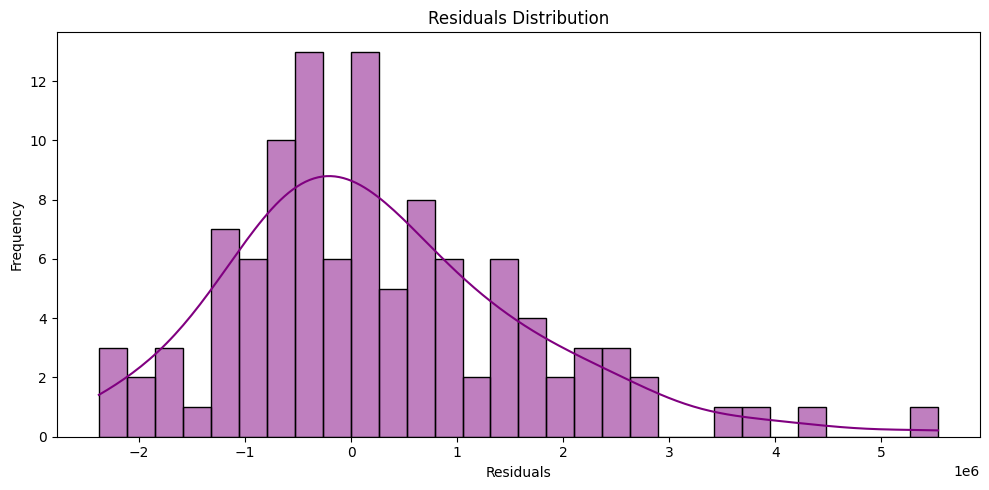

In [58]:
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [59]:
os.makedirs("models", exist_ok=True)
joblib.dump(pipeline, "models/house_price_model.pkl")
print("Model saved to 'models/house_price_model.pkl'")

Model saved to 'models/house_price_model.pkl'
